In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
import os

path = os.listdir('C:/Users/asmaa/Desktop/brain_tumor_dataset/')
classes = {'no':0, 'yes':1}

In [9]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/asmaa/Desktop/brain_tumor_dataset/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [10]:
X = np.array(X)
Y = np.array(Y)

In [11]:
np.unique(Y)

array([0, 1])

In [12]:
pd.Series(Y).value_counts()

1    155
0     98
dtype: int64

In [13]:
X.shape

(253, 200, 200)

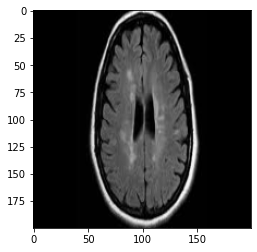

In [29]:
plt.imshow(X[4], cmap='gray')

In [15]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(253, 40000)

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [17]:
xtrain.shape, xtest.shape

((202, 40000), (51, 40000))

In [18]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [19]:
from sklearn.decomposition import PCA


In [20]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(202, 40000) (51, 40000)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [22]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [23]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [24]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))


Training Score: 1.0
Testing Score: 0.6666666666666666


In [25]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9207920792079208
Testing Score: 0.6470588235294118


In [26]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)


(array([ 2,  9, 10, 14, 15, 16, 17, 20, 22, 31, 33, 34, 36, 41, 42, 43, 48,
        49], dtype=int64),)

In [27]:
pred[36]

1

In [28]:
ytest[36]

0

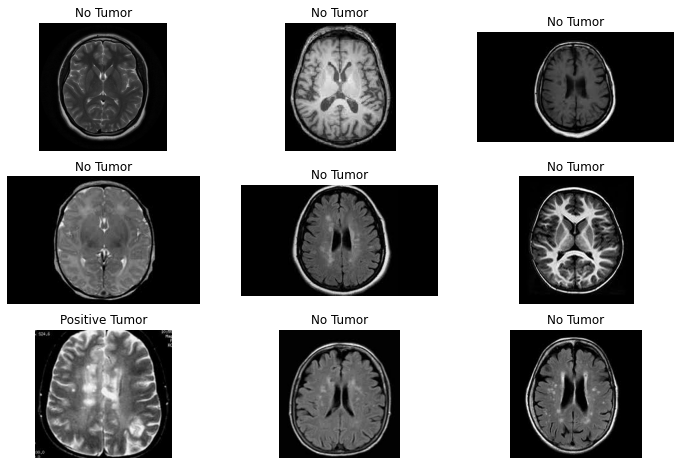

In [35]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/asmaa/Desktop/')
c=1
for i in os.listdir('C:/Users/asmaa/Desktop/no/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/Users/asmaa/Desktop/no/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

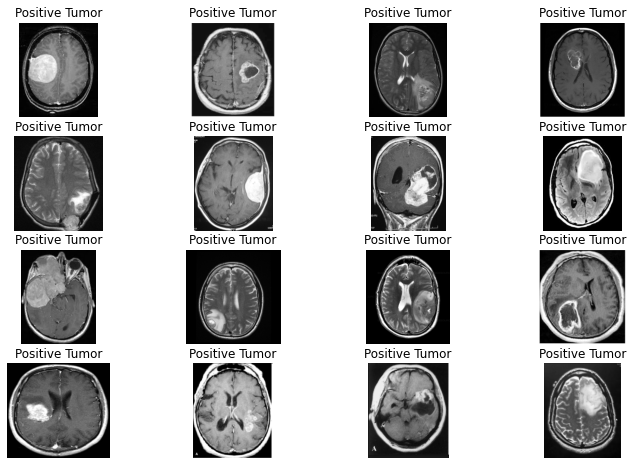

In [36]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/asmaa/Desktop/')
c=1
for i in os.listdir('C:/Users/asmaa/Desktop/yes/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/asmaa/Desktop/yes/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1